<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [7]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [12]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [13]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


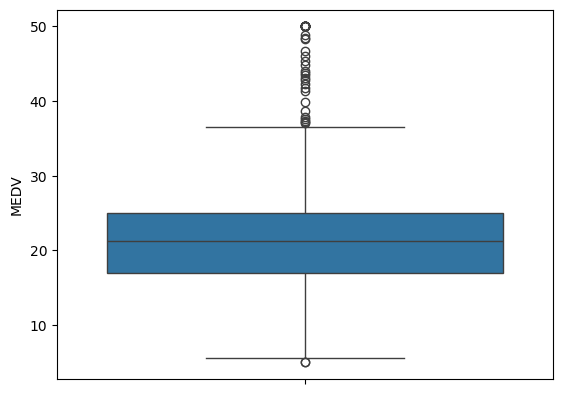

In [16]:
## Task 2
#For the "Median value of owner-occupied homes" provide a boxplot - MEDV
a = sns.boxplot(y='MEDV', data=boston_df)
pyplot.show()

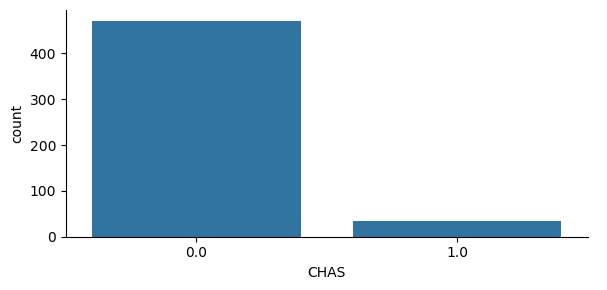

In [41]:
## Task 2
# Q1: Provide a bar plot for the Charles river variable - CHAS
b = sns.catplot(x='CHAS',
            kind='count', data=boston_df,
            height = 3, aspect = 2)
pyplot.show()

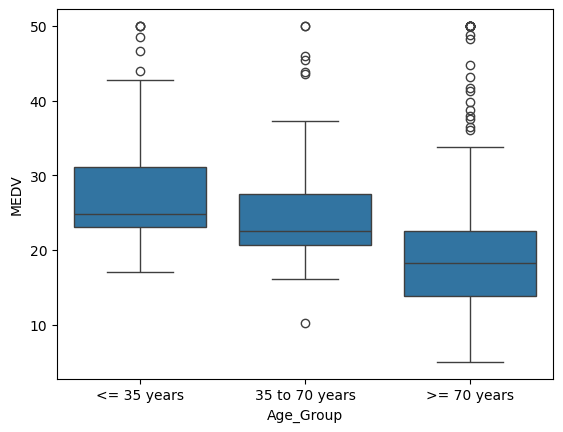

In [42]:
## Task 2
# Q2: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

#Discretize the AGE variable into three groups
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['<= 35 years', '35 to 70 years', '>= 70 years'])

c = sns.boxplot(x='Age_Group', y='MEDV', data=boston_df)
pyplot.show()

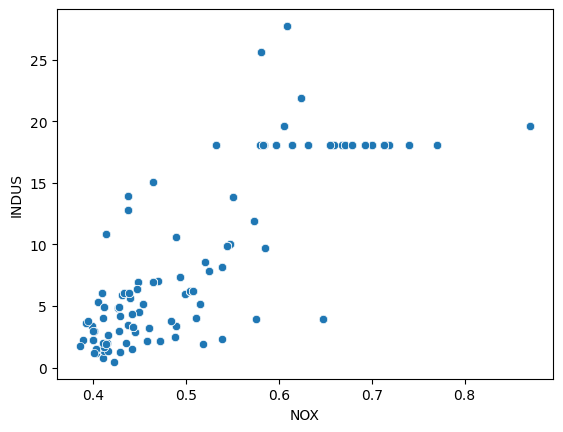

In [43]:
## Task 2
# Q3: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
d = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.show()

In [29]:
#Answer: The data show that, in general, in areas with less non-retail business acres per town, it has less nitric oxides concentration. The variables are related.

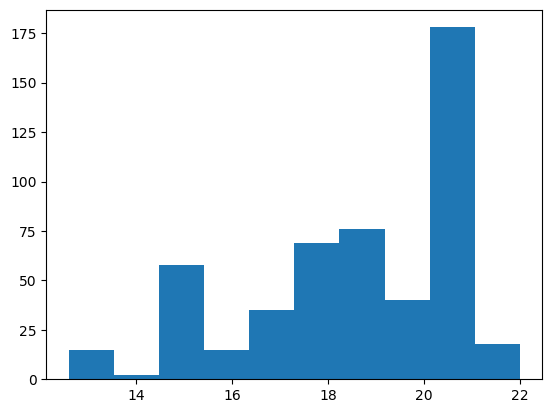

In [44]:
## Task 2
# Q4: Ceate a histogram for the pupil to teacher ratio variable - PTRATIO 
e= pyplot.hist(boston_df['PTRATIO'])
pyplot.show()

In [45]:
## Task 3
# Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Group the data based on the Charles River boundary (CHAS = 1 or 0)
charles_group = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Houses bounded by the river
non_charles_group = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Houses not bounded by the river

# Perform the independent t-test
t_stat, p_value = scipy.stats.ttest_ind(charles_group, non_charles_group, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 3.113291312794837
P-value: 0.003567170098137517


In [40]:
#As P-value is less 0.05, it suggests that there is a statistically significant difference between the median values of houses that are bounded by the Charles River versus those that are not.

In [46]:
## Task 3
# Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Discretize the AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['Low', 'Medium', 'High'])

# Group the data by AGE_group and extract MEDV for each group
low_group = boston_df[boston_df['AGE_group'] == 'Low']['MEDV']
medium_group = boston_df[boston_df['AGE_group'] == 'Medium']['MEDV']
high_group = boston_df[boston_df['AGE_group'] == 'High']['MEDV']

# Perform a one-way ANOVA test to compare the groups
f_stat, p_value = scipy.stats.f_oneway(low_group, medium_group, high_group)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


In [39]:
#Answer: As the p-value is less than the significance level (0.05), it suggests that there is a statistically significant difference in the median values of houses (MEDV) for the different AGE groups.

In [49]:
## Task 3
# Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Pearson Correlation Coefficient (r): {correlation}')
print(f'P-value: {p_value}')

Pearson Correlation Coefficient (r): 0.7636514469209192
P-value: 7.913361061210442e-98


In [50]:
#Conclusion: 
#The correlation coefficient of 0.76 indicates a strong positive correlation between NOX concentrations and the proportion of non-retail business acres per town.
#The p-value is extremely small (essentially zero), indicating that this correlation is statistically significant.
#Thus, we reject the null hypothesis and conclude that there is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

In [53]:
## Task 3
# Q4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#--